In [244]:
# import the packages we need to investigate the data
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
from calendar import monthrange
import matplotlib.dates as mdates
import scipy.stats as st
import requests
from meteostat import Point, Daily

import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', False)
seed= 92

Import the data from train.csv

In [245]:
# Read the CSV file into a DataFrame
df = pd.read_csv('train.csv')

print(df.head())  # Display the first few rows of the DataFrame



   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]


In [246]:
df.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
dtype: object

In [247]:
df.min()

PassengerId                      1
Survived                         0
Pclass                           1
Name           Abbing, Mr. Anthony
Sex                         female
Age                           0.42
SibSp                            0
Parch                            0
Ticket                      110152
Fare                           0.0
dtype: object

In [248]:
# separate the dataframe by the death and survival
death_df = df[df["Survived"]== 0]
live_df = df[df["Survived"]== 1]
death_total = len(death_df)
live_total = len(live_df)


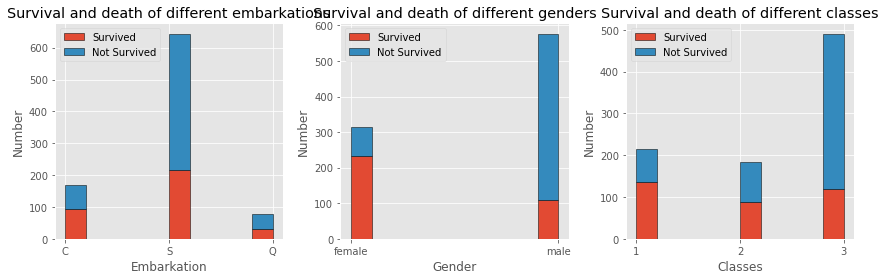

In [249]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Embarkation
filtered_live_df = live_df.dropna(subset=['Embarked'])
filtered_death_df = death_df.dropna(subset=['Embarked'])
axes[0].hist([filtered_live_df['Embarked'], filtered_death_df['Embarked']], stacked=True, density=False, edgecolor='black')
axes[0].set_title('Survival and death of different embarkations')
axes[0].set_ylabel('Number')
axes[0].set_xlabel('Embarkation')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Gender
axes[1].hist([live_df['Sex'], death_df['Sex']], stacked=True, density=False, edgecolor='black')
axes[1].set_title('Survival and death of different genders')
axes[1].set_ylabel('Number')
axes[1].set_xlabel('Gender')
axes[1].legend(['Survived', 'Not Survived'])

# Plot 3: Pclass
axes[2].hist([live_df['Pclass'], death_df['Pclass']], stacked=True, density=False, edgecolor='black')
axes[2].set_title('Survival and death of different classes')
axes[2].set_ylabel('Number')
axes[2].set_xlabel('Classes')
axes[2].legend(['Survived', 'Not Survived'])
axes[2].set_xticks(range(1, 4))
axes[2].set_xticklabels(['1', '2', '3'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


We use scatterplot to investigate the relationship between passengerID and survival rate

In [250]:

# Create the scatter plot
live_df['PassengerId'].mean()
death_df['PassengerId'].mean()
df['PassengerId'].mean()


446.0

The mean value of passengerID of survivied is 444, and the mean value of passengerID of dead is 447.

The mean value of passengerID of total passengers is 446.

So it can be concluded that the ID has little impact on the survival rate.

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

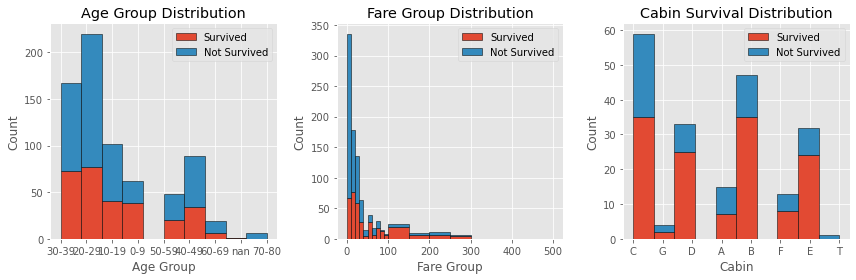

In [251]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Age Group Distribution
filtered_live_df = live_df.dropna(subset=['Age'])
filtered_death_df = death_df.dropna(subset=['Age'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-80']

# Segment people by age
filtered_live_df['Age Group'] = pd.cut(filtered_live_df['Age'], bins=bins, labels=labels, right=False)
filtered_death_df['Age Group'] = pd.cut(filtered_death_df['Age'], bins=bins, labels=labels, right=False)

filtered_live_df['Age Group'] = filtered_live_df['Age Group'].astype(str)
filtered_death_df['Age Group'] = filtered_death_df['Age Group'].astype(str)



axes[0].hist([filtered_live_df['Age Group'], filtered_death_df['Age Group']], stacked=True, density=False, edgecolor='black')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Group Distribution')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Fare Group Distribution
filtered_live_df = live_df.dropna(subset=['Fare'])
filtered_death_df = death_df.dropna(subset=['Fare'])

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', '100-150', '150-200', '200-250', '250-300', '300-350', '350-400', '400-450', '450-500', '500+']

axes[1].hist([filtered_live_df['Fare'], filtered_death_df['Fare']], bins=bins, stacked=True, density=False, edgecolor='black')
axes[1].set_xlabel('Fare Group')
axes[1].set_ylabel('Count')
axes[1].set_title('Fare Group Distribution')
axes[1].legend(['Survived', 'Not Survived'])

# Plot 3: Cabin Survival Distribution
filtered_live_df = live_df.dropna(subset=['Cabin'])
filtered_death_df = death_df.dropna(subset=['Cabin'])

filtered_live_df['Initial'] = filtered_live_df['Cabin'].apply(lambda x: x[0])
filtered_death_df['Initial'] = filtered_death_df['Cabin'].apply(lambda x: x[0])

axes[2].hist([filtered_live_df['Initial'], filtered_death_df['Initial']], stacked=True, density=False, edgecolor='black')
axes[2].set_xlabel('Cabin')
axes[2].set_ylabel('Count')
axes[2].set_title('Cabin Survival Distribution')
axes[2].legend(['Survived', 'Not Survived'])

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


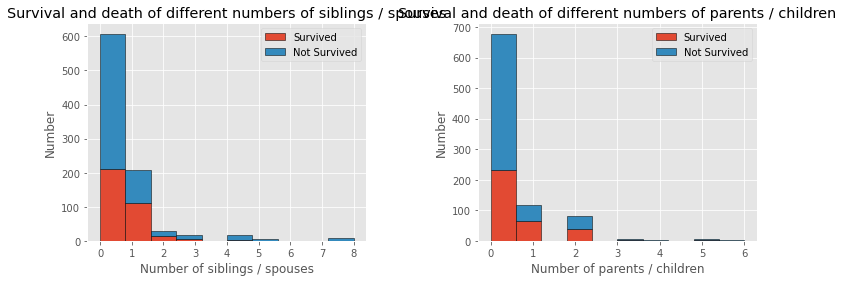

In [252]:

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Number of Siblings / Spouses
axes[0].hist([live_df['SibSp'], death_df['SibSp']], stacked=True, density=False, edgecolor='black')
axes[0].set_title('Survival and death of different numbers of siblings / spouses')
axes[0].set_ylabel('Number')
axes[0].set_xlabel('Number of siblings / spouses')
axes[0].legend(['Survived', 'Not Survived'])

# Plot 2: Number of Parents / Children
axes[1].hist([live_df['Parch'], death_df['Parch']], stacked=True, density=False, edgecolor='black')
axes[1].set_title('Survival and death of different numbers of parents / children')
axes[1].set_ylabel('Number')
axes[1].set_xlabel('Number of parents / children')
axes[1].legend(['Survived', 'Not Survived'])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()



## Sample Investigation

In [253]:
train= pd.read_csv('train.csv')
print(f"Shape of train:    {train.shape}")
print('#TRAIN INFO:')
print(train.info(),'\n')

Shape of train:    (891, 12)
#TRAIN INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None 



In [254]:
print(F"Number of duplicates in PassengerId column = {len(train)-len(pd.unique(train['PassengerId']))}")

Number of duplicates in PassengerId column = 0


### Survived:
The label column, with a datatype of int64, it has two values: 0 represents passengers who did not survive, and 1 represents those who did. Among the 891 passengers in the training set, 61.6% survived and 38.4% did not.

In [255]:
print("Value count")
print(train['Survived'].value_counts())
print("\nRatio")
print(train['Survived'].value_counts(normalize= True))

Value count
0    549
1    342
Name: Survived, dtype: int64

Ratio
0    0.616162
1    0.383838
Name: Survived, dtype: float64


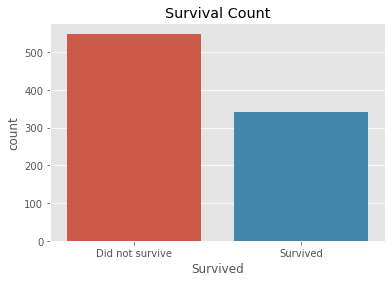

In [257]:
sns.countplot(data=train, x='Survived')
plt.xticks(ticks=[0, 1], labels=['Did not survive', 'Survived'])
plt.title("Survival Count")

plt.show()

### Pclass:
1 represents 1st class, 2 represents 2nd class, and 3 represents 3rd class. It can be noticed that the survival rate in the 1st class is the highest. We can show that through pivot table and histograms.

In [258]:
pclass_pivot = train.pivot_table(index='Pclass', columns='Survived', values='PassengerId', aggfunc='count')
pclass_pivot.columns = ['No', 'Yes']
pclass_pivot['Total'] = pclass_pivot['Yes'] + pclass_pivot['No']
pclass_pivot['Survival %'] = round(pclass_pivot['Yes'] / (pclass_pivot['Yes'] + pclass_pivot['No']) * 100,1).astype(str) + '%'
pclass_pivot

,No,Yes,Total,Survival %
Pclass,,,,
1,80,136,216,63.0%
2,97,87,184,47.3%
3,372,119,491,24.2%


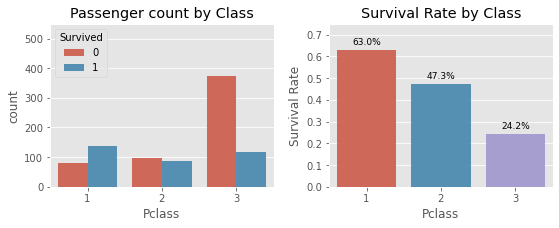

In [261]:
fig= plt.figure(figsize=(9,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Pclass", data=train,  alpha= 0.9, ax=ax1, hue="Survived")
ax1.set_title("Passenger count by Class")
ax1.set_ylim([0, 550])


ax2= plt.subplot(1,2,2)
pclass_survival_rate = train.groupby('Pclass')['Survived'].mean().reset_index()
sns.barplot(x='Pclass', y='Survived', data=pclass_survival_rate,  alpha= 0.9, ax= ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_xlabel('Pclass')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.75])
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()

### Sex

This column indicates the sex of the passenger, with a datatype of object and values of either male or female. In our training data, we have 577 males and 314 females. Notably, being a female is good predictive of survival as 74.2% of women survived while only 18.9% of men survived.

In [262]:
sex_pivot = train.pivot_table(index='Sex', columns='Survived', values='PassengerId', aggfunc='count', fill_value= 0)
sex_pivot.columns = ['No', 'Yes']
sex_pivot['Total'] = sex_pivot.sum(axis=1)
sex_pivot['Survival %'] = round(sex_pivot['Yes'] / sex_pivot['Total']  * 100,1).astype(str) + '%'
sex_pivot

,No,Yes,Total,Survival %
Sex,,,,
female,81,233,314,74.2%
male,468,109,577,18.9%


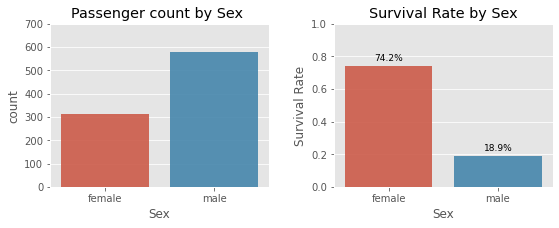

In [280]:
fig= plt.figure(figsize=(9,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="Sex", data=train, alpha= 0.9, order=['female', 'male'], ax=ax1)
ax1.set_title("Passenger count by Sex ")
ax1.set_ylim([0, 700])


ax2= plt.subplot(1,2,2)
sex_survival_rate = train.groupby('Sex')['Survived'].mean().reset_index()
sns.barplot(x='Sex', y='Survived', data=sex_survival_rate,  alpha= 0.9, ax= ax2)
ax2.set_title('Survival Rate by Sex')
ax2.set_xlabel('Sex')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 1])

# add annotation above each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.3)
plt.show()

### Age:
Let's investigate age distribution in the datasets. The histogrom plots below indicate that the distribution of age of passengers on Titanic, and the kernal density plot (kde) below confirm that. However, when we look at the boxplot of age by survival status, we can see that the age distributions for both the "survived" and "did not survive" groups appear similar. This suggests that age, on it's own, may not be a strong predictor for survival.

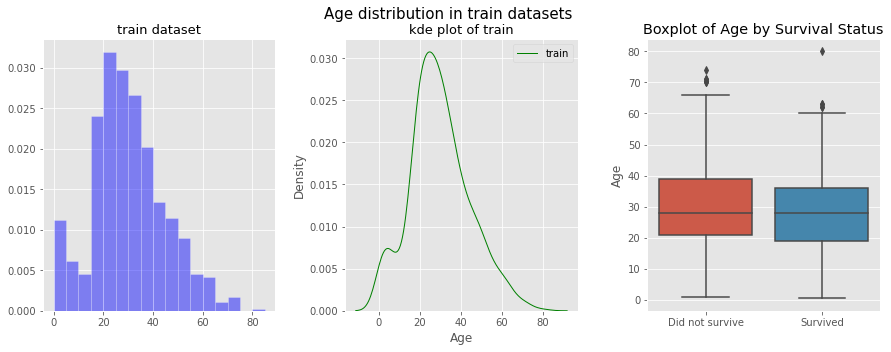

In [276]:
fig = plt.figure(figsize=(15, 5))

ax1 = plt.subplot(1, 3, 1)
count, bin_edges = np.histogram(train['Age'].dropna(), bins=range(0, 90, 5))
ax1.hist(train['Age'].dropna(), bins=bin_edges, alpha= 0.45, density=True, color='blue', edgecolor='white')
ax1.set_title('train dataset', fontsize=13)


ax2 = plt.subplot(1, 3, 2)
sns.kdeplot(data=train, x='Age', color='green', label='train', linewidth= 1, ax=ax2)
plt.legend()
ax2.set_title('kde plot of train', fontsize=13)

ax3 = plt.subplot(1, 3, 3)
sns.boxplot(data=train.dropna(subset=['Age']), y="Age", x="Survived", ax=ax3)
ax3.set_xticks([0, 1], ['Did not survive', 'Survived'])
ax3.set_title("Boxplot of Age by Survival Status")
ax3.set_xlabel("")

plt.subplots_adjust(hspace=0.3, wspace=0.3)
plt.suptitle('Age distribution in train datasets', y=0.97, fontsize=15)

plt.show()

### SibSp:
Represents the number of siblings and spouses a passenger had aboard. Its datatype is int64. 

We can see in the plot below that the majority of passengers didn't have siblings or spouses aboard, and those who had one or two SibSp have the highest survival rate, we also can see that none of the passengers with 5 or 6 SibSp survived.

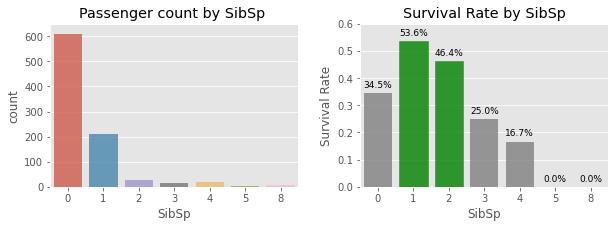

In [277]:
fig= plt.figure(figsize=(10,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x="SibSp", data=train, alpha= 0.8, ax=ax1)
ax1.set_title("Passenger count by SibSp ")
ax1.set_ylim([0, 650])

ax2= plt.subplot(1,2,2)
# calculate survival rate for each SipSp group
sibsp_survival_rate = train.groupby('SibSp')['Survived'].mean().reset_index()
sns.barplot(x='SibSp', y='Survived', data=sibsp_survival_rate, alpha= 0.8, color='grey', ax= ax2)

# set the color of second and third bars to green 
for i in range(1,3):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival Rate by SibSp')
ax2.set_xlabel('SibSp')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.6])

# add annotation above each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()

In [281]:
SibSp_pivot= train.pivot_table(index= 'SibSp', columns='Survived', values='PassengerId', aggfunc='count', fill_value= 0)
SibSp_pivot.columns= ['No','Yes']

# add columns named 'Total' and 'Survival rate'
SibSp_pivot['Total'] = SibSp_pivot.sum(axis=1)
SibSp_pivot['Survival %']= round(SibSp_pivot['Yes']/SibSp_pivot['Total']*100,1).astype(str) + '%'
SibSp_pivot

,No,Yes,Total,Survival %
SibSp,,,,
0,398,210,608,34.5%
1,97,112,209,53.6%
2,15,13,28,46.4%
3,12,4,16,25.0%
4,15,3,18,16.7%
5,5,0,5,0.0%
8,7,0,7,0.0%


### Parch:
Refers to the number of parents and/or children aboard. 

We see below that the majority of passengers did not have parents or children aboard, and people with 2,3 and 4 Parch has the highest survival rate.

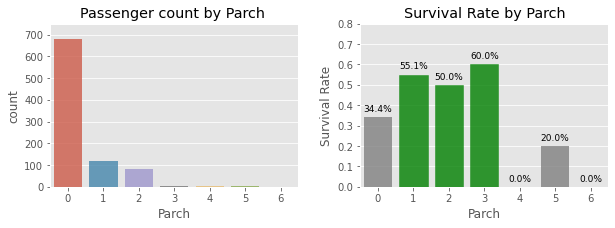

In [295]:
fig= plt.figure(figsize=(10,3))

ax1= plt.subplot(1,2,1)
sns.countplot(x='Parch', data=train, alpha= 0.8, ax=ax1)
ax1.set_title("Passenger count by Parch ")
ax1.set_ylim([0, 750])

ax2= plt.subplot(1,2,2)
# calculate survival rate for each Parch group
Parch_survival_rate = train.groupby('Parch')['Survived'].mean().reset_index()
sns.barplot(x='Parch', y='Survived', data=Parch_survival_rate, alpha= 0.8, color='grey', ax= ax2)

# set the color of three highest bars to green 
for i in range(1,4):
    plt.gca().get_children()[i].set_color('g')
ax2.set_title('Survival Rate by Parch')
ax2.set_xlabel('Parch')
ax2.set_ylabel('Survival Rate')
ax2.set_ylim([0, 0.8])
# add annotation above each bar
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9, color='black', xytext=(0, 8),
                textcoords='offset points')

plt.subplots_adjust(wspace=0.25)
plt.show()